# CH3 Principal Components Analysis


## Step 1: Get some data

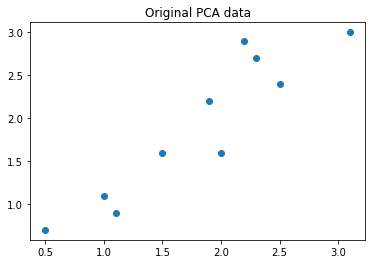

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics


X1 = [2.5, 0.5, 2.2, 1.9, 3.1 ,2.3 ,2 ,1 ,1.5, 1.1]
MX1 = statistics.mean(X1)
Y1=[ 2.4 ,0.7 ,2.9 ,2.2 ,3.0 ,2.7 ,1.6 ,1.1 ,1.6 ,0.9]
MY1 = statistics.mean(Y1)


plt.scatter(X1,Y1)
plt.title('Original PCA data')
plt.show()

## Step 2: Subtract the mean

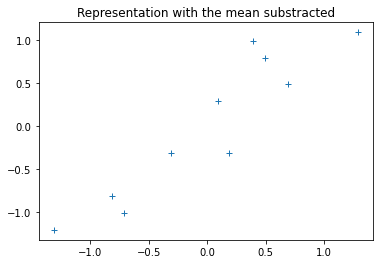

In [4]:
vctrX = np.array(X1)
vctrY =  np.array(Y1)
#DataAdjust X Y 
X = vctrX - MX1
Y = vctrY -MY1
plt.plot(X,Y,'+')
plt.title('Representation with the mean substracted')
plt.show()


## Step 3: calculate the covariance matrix 

In [5]:
#calculate the covariance matrix 
# C = np.cov(vctrX,vctrY)


# Cov(a,a)= Var(a)
covXX= 0
covYY = 0
covXY= 0

for i in range(len(X)) :
    covXX += (vctrX[i]-MX1)**2
    covYY += (vctrY[i]-MY1)**2
    covXY+= ((vctrX[i]-MX1)*(vctrY[i]-MY1))
covXX/=len(X)-1 
covYY /=len(X)-1
covXY /= len(X)-1
# print(C)
# print(covXX)
# print (covYY)
# print(covXY)

C= np.array([[covXX,covXY],[covXY,covYY]])
print(C)


[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


- If COV(xi, xj) = 0 then the variables are uncorrelated
- If COV(xi, xj) > 0 then the variables are positively correlated
- If COV(xi, xj) < 0 then the variables are negatively correlated

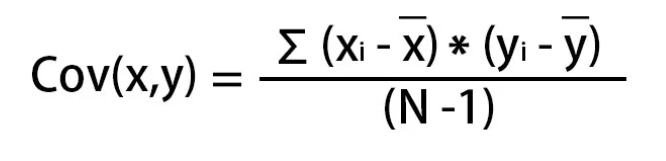

In [17]:
## Step4 calculate the eigenvectors and eigenvalues of the covariance matrix 
#Calcul vecteur propre & valeur propre 

#Vecteurs propre (vcp) & valeur propres (vlp) 
vlp , vcp = np.linalg.eig(C)
idx = vlp.argsort()[::-1]   
# ordonner par valeur propre, de la plus élevée à la plus petite. Cela nous donne les composants dans par ordre d'importance
vlp = vlp[idx]
vcp = vcp[:,idx]
print(f'Vecteur propre : {vcp}')
print (f'Valeur propre :{vlp}' )
print("---------------")

# 
A = np.array([X,Y])
print(f'A = {A}')
A = np.transpose(A)
print(f'AT = {A}')
#les poids de chaque donnée 
W =[]
for i in range(len(A)):
    w1 = np.dot(vcp[0], A[i]) 
    w2 = np.dot(vcp[1],A[i])
    W.append((w1,w2))
print("---------------")
# les poids de chaque  point X Y(data 1 on va l'ecrire en combinaison lineare sous forme une matrice ) 
print(f'W = {W}')
fd = W[0][0]* vcp[0] + W[0][1] * vcp[1]

rod = np.add(fd,[MX1,MY1])
print("---------------")


print(f'AT[0] ={A[0]}')
print(f'fd = { fd}')
print(f'rod = {rod}')
print(f'X1 ={X1}')
print(f'Y1 ={Y1}')



Vecteur propre : [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]
Valeur propre :[1.28402771 0.0490834 ]
---------------
A = [[ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
 [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]]
---------------
W = [(-0.8279701862010878, -0.1751153070469159), (1.7775803252804292, 0.14285722654428024), (-0.9921974944148884, 0.38437498888041216), (-0.2742104159753993, 0.1304172065741268), (-1.6758014186445398, -0.20949846125675364), (-0.9129491031588078, 0.17528244362036954), (0.09910943749844434, -0.34982469809712113), (1.1445721637986601, 0.04641725818328102), (0.4380461367624502, 0.017764629675082882), (1.2238205550547405, -0.16267528707676226)]
---------------
AT = [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
AT[0] =[0.69 0.49]
fd = [0.69 0.49]
rod = [2.5 2.4]
X1 =[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]
Y1 =[2.

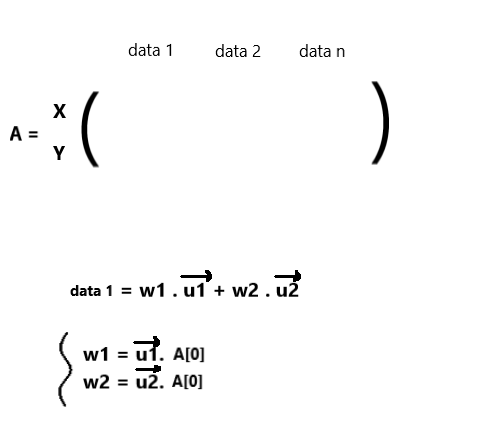

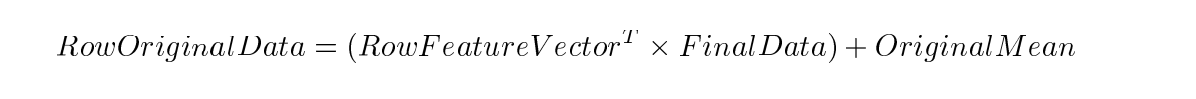

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


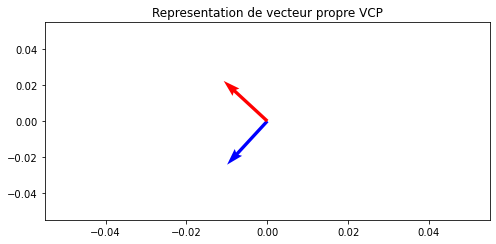

In [15]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
origin = np.array([[0, 0],[0,0]])
plt.quiver(*origin, vcp[0]*2, vcp[1]*2, color=['blue', 'red'], scale=15)
plt.title("Representation de vecteur propre VCP")
plt.show()


### On remarque que nos vecteurs propres forment une base orthonormale et chaque donnée peut être projeté sur cette base